In [ ]:
import pandas                    as     pd
from   sklearn.neighbors         import NearestNeighbors
from   sklearn.neighbors         import KNeighborsClassifier
from   sklearn.model_selection   import GridSearchCV
from   sklearn.preprocessing     import LabelEncoder
from   sklearn.feature_selection import SelectKBest, f_classif
from   IPython.display           import display
import matplotlib.pylab          as     plt 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# funcion para importar el dataset
def get_data(file):
    df= pd.read_csv(file)
    print(df.shape)
    display(df.head(2))
    return df

In [ ]:
filedtrain = 'https://raw.githubusercontent.com/dogilla/Data-Science/main/coris_train.csv'
filedtest  = 'https://raw.githubusercontent.com/dogilla/Data-Science/main/coris_test.csv' 
df_train   =  get_data(filedtrain)
df_test    =  get_data(filedtest)
X_0 = pd.read_csv('https://raw.githubusercontent.com/jimmyhm/BigData2021-1/master/12-Arboles/coris.csv')

(396, 11)


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,67,124,4.82,3.24,21.10,1,48,28.49,8.42,30,0
1,68,112,0.41,1.88,10.29,0,39,22.08,20.98,27,0


(66, 11)


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1


In [ ]:
# Imprimimos los tipos de datos
print(X_0.dtypes)

row.names      int64
sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist        int64
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object


chd,0,1
famhist,,
0,206,64
1,96,96


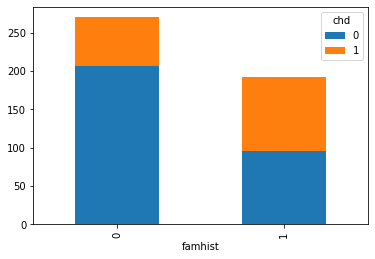

In [ ]:
#comparamos cardiopatia contra historial familiar
obvsfam =pd.crosstab(X_0.famhist,X_0.chd)
display(obvsfam)
obvsfam.plot.bar(stacked=True)

In [ ]:
def get_obesos(df):
    df["obeso"]=0
    df["obeso"][df["obesity"] > 29.0] = 1
    return df

def get_adultos(df):
    df["adulto"]=0
    df["adulto"][df["age"] > 18.0] = 1
    return df

def get_fumadores(df):
    df["fumador"]=0
    df["fumador"][df["tobacco"] > 7.0] = 1
    return df


# La variable a la que le daremos importancia es a chd (cardiopatia corolaria)
print(type(df_train))
y_train = df_train.pop("chd")
X_train = df_train
y_test=df_test.pop("chd")
X_test=df_test

# Agregamos variables discretas
X_train = get_obesos(X_train)
X_test  = get_obesos(X_test)
X_train = get_fumadores(X_train)
X_test  = get_fumadores(X_test)
X_train = get_adultos(X_train)
X_test  = get_adultos(X_test)

display(X_train.head(2))

<class 'pandas.core.frame.DataFrame'>


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,obeso,fumador,adulto
0,67,124,4.82,3.24,21.10,1,48,28.49,8.42,30,0,0,1
1,68,112,0.41,1.88,10.29,0,39,22.08,20.98,27,0,0,1


In [ ]:

#aplicamos un string indexer
col=['famhist','obeso','fumador','adulto']
def stringIndexer(df,col):
    X=df
    for i in col:
        X[i+"strindexer"]=LabelEncoder().fit_transform(X[i]) 
        X=X.drop(i,1)
    return X

In [ ]:
display(X_train.head(18))

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,obeso,fumador,adulto
0,67,124,4.82,3.24,21.10,1,48,28.49,8.42,30,0,0,1
1,68,112,0.41,1.88,10.29,0,39,22.08,20.98,27,0,0,1
2,69,118,4.46,7.27,29.13,1,48,29.01,11.11,33,1,0,1
3,70,122,0.00,3.37,16.10,0,67,21.06,0.00,32,0,0,1
4,71,118,0.00,3.67,12.13,0,51,19.15,0.60,15,0,0,0
5,72,130,1.72,2.66,10.38,0,68,17.81,11.10,26,0,0,1
6,73,130,5.60,3.37,24.80,0,58,25.76,43.20,36,0,0,1
7,74,126,0.09,5.03,13.27,1,50,17.75,4.63,20,0,0,1
8,75,128,0.40,6.17,26.35,0,64,27.86,11.11,34,0,0,1
9,76,136,0.00,4.12,17.42,0,52,21.66,12.86,40,0,0,1


In [ ]:
X_train=stringIndexer(X_train,col)
X_test=stringIndexer(X_test,col)
X_test.head(5)

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhiststrindexer,obesostrindexer,fumadorstrindexer,adultostrindexer
0,1,160,12.00,5.73,23.11,49,25.30,97.20,52,1,0,1,1
1,2,144,0.01,4.41,28.61,55,28.87,2.06,63,0,0,0,1
2,3,118,0.08,3.48,32.28,52,29.14,3.81,46,1,1,0,1
3,4,170,7.50,6.41,38.03,51,31.99,24.26,58,1,1,1,1
4,5,134,13.60,3.50,27.78,60,25.99,57.34,49,1,0,1,1


Text(0.5, 1.0, 'Valores de k vs exactitud')

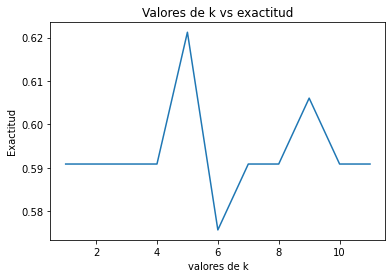

In [ ]:
#Probaremos con diferentes valores de k de tal manera que se mejore la exactitud del modelo
k_range = list(range(1,12))
score   = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test, y_test))

plt.plot(k_range,score)
plt.xlabel("valores de k")
plt.ylabel("Exactitud")
plt.title("Valores de k vs exactitud")